Load data and assign colours

In [1]:
import json
import os
from uncertainties import ufloat
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

In [2]:
d = {}
d["31034"] = json.load(open(os.path.join("..", "data", "ex_errors", "2019-12-03-31034-propane-01.results.json"), "r"))
d["31846"] = json.load(open(os.path.join("..", "data", "ex_errors", "2019-11-01-31846-ex-31034-propane-01.results.json"), "r"))
d["31034"]["c"] = "C0"
d["31846"]["c"] = "C1"

Plot GHSV variation points on a X/S graph.

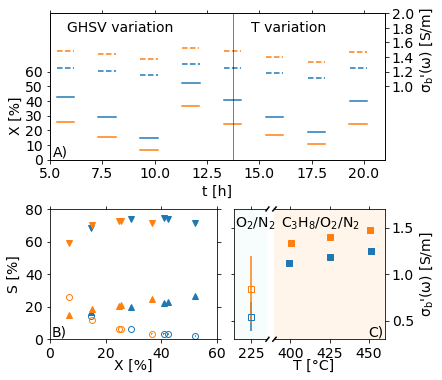

In [3]:
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(100, 100, wspace=0.1, hspace=0.1, figure=fig)
ax = []

ax.append(plt.subplot(grid[60:, :50]))
ax.append(plt.subplot(grid[60:, 55:65]))
ax.append(plt.subplot(grid[60:, 67:]))
ax.append(plt.subplot(grid[:45, :]))
ax.append(ax[-1].twinx())

for sample in d:
    X = []
    S = {"CO":[], "CO2":[], "propylene":[]}
    T = []
    dp = {"σ": [], "ε'b": [], 'ε"b': []}
    tstart = d[sample]["sections"][0]["uts0"]
    for sec in d[sample]["sections"]:
        if sec["id"] in ["02","03","04","05","06"]:
            X.append(ufloat(*sec["Xp"]))
            S["CO"].append(ufloat(*sec["Sp"]["CO"]))
            S["CO2"].append(ufloat(*sec["Sp"]["CO2"]))
            S["propylene"].append(ufloat(*sec["Sp"]["propylene"]))
        if sec["id"] in ["06", "07", "08", "09"]:
            T.append(ufloat(*sec["T"]))
            for key in dp:
                dp[key].append(ufloat(*sec[key]))
        if "Xp" in sec.keys():
            ax[3].plot(((sec["uts0"] - tstart)/3600, (sec["uts1"] - tstart)/3600), (sec["Xp"][0], sec["Xp"][0]),
                   color = d[sample]["c"], marker = " ")
        if "σ" in sec.keys():
            ax[4].plot(((sec["uts0"] - tstart)/3600, (sec["uts1"] - tstart)/3600), (sec["σ"][0], sec["σ"][0]),
                   color = d[sample]["c"], marker = " ", linestyle = "--")
    ax[0].errorbar([i.n for i in X], [i.n for i in S["CO2"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO2"]],
                     marker = "^", linestyle = "", color = d[sample]["c"])
    ax[0].errorbar([i.n for i in X], [i.n for i in S["CO"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO"]],
                     marker = "v", linestyle = "", color = d[sample]["c"])
    ax[0].errorbar([i.n for i in X], [i.n for i in S["propylene"]],
                     xerr = [i.s for i in X], yerr = [i.s for i in S["CO2"]],
                     marker = "o", linestyle = "", color = d[sample]["c"], fillstyle="none")
    ax[1].errorbar(225, d[sample]["results"]["σr"][0],
                   yerr = d[sample]["results"]["σr"][1], fillstyle="none",
                   marker = "s", linestyle = "", color = d[sample]["c"])
    ax[2].errorbar([i.n for i in T], [i.n for i in dp["σ"]],
                     xerr = [i.s for i in T], yerr = [i.s for i in dp["σ"]],
                     marker = "s", linestyle = "", color = d[sample]["c"])
    
ax[0].tick_params(left=True, right=True, bottom=True, top=True,
                  labelleft=True, labelright=False, labeltop=False, labelbottom=True)
ax[1].tick_params(left=True, right=False, bottom=True, top=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax[2].tick_params(left=False, right=True, bottom=True, top=True,
                  labelleft=False, labelright=True, labeltop=False, labelbottom=True)
ax[3].tick_params(left=True, right=False, bottom=True, top=True,
                  labelleft=True, labelright=False, labeltop=False, labelbottom=True)


ax[0].set_xlim(left=0,right=60)
ax[0].set_ylim(bottom=0, top=80)
ax[0].set_xlabel("X [%]")
ax[0].xaxis.set_label_coords(0.5,-0.15)
ax[0].set_ylabel("S [%]")

ax[1].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
br = 0.015
wr = 3
kwargs = dict(transform=ax[1].transAxes, color='k', clip_on=False)
#ax[1].plot((1-br,1+br), (-br,+br), **kwargs)
#ax[1].plot((1-br,1+br),(1-br,1+br), **kwargs)
ax[1].plot((1-br*wr,1+br*wr), (1-br,1+br), **kwargs)
ax[1].plot((1-br*wr,1+br*wr), (-br,+br), **kwargs)
kwargs.update(transform=ax[2].transAxes)  # switch to the bottom axes
ax[2].plot((-br,+br), (1-br,1+br), **kwargs)
ax[2].plot((-br,+br), (-br,+br), **kwargs)

for a in ax[1:3]:
    a.set_ylim(bottom=0.3, top=1.7)
    a.set_ylim(bottom=0.3, top=1.7)
ax[1].set_xlim(left=221, right=229)
ax[1].set_xticks([225])
ax[2].set_xlim(left=390, right=460)
ax[2].set_xticks([400,425,450])
ax[2].set_xlabel("T [°C]")
ax[2].xaxis.set_label_coords(0.35,-0.15)
ax[2].yaxis.set_label_position("right")
ax[2].set_ylabel("σ$_\mathrm{b}$'(ω) [S/m]")

ax[3].set_ylim(bottom=0, top=100)
ax[3].set_xlim(left=5, right=21)
ax[3].set_ylabel("X [%]")
ax[3].set_xlabel("t [h]")
ax[3].set_yticks([0,10,20,30,40,50,60])
ax[3].yaxis.set_label_coords(-0.08,0.3)

ax[4].set_ylim(bottom=0, top=2.0)
ax[4].set_yticks([1.0,1.2,1.4,1.6,1.8,2])
ax[4].set_ylabel("σ$_\mathrm{b}$'(ω) [S/m]")
ax[4].yaxis.set_label_coords(1.10,0.75)

ax[2].text(0.01,0.95,"O$_2$/N$_2$", transform=ax[1].transAxes, ha="left", va="top")
ax[2].text(0.06,0.95,"C$_3$H$_8$/O$_2$/N$_2$", transform=ax[2].transAxes, ha="left", va="top")
ax[3].text(0.05,0.95,"GHSV variation", transform=ax[3].transAxes, ha="left", va="top")
ax[4].text(0.60,0.95,"T variation", transform=ax[3].transAxes, ha="left", va="top")

ax[1].set_facecolor("#f7fcfd")
ax[2].set_facecolor("#fff5eb")

ax[4].plot((13.75,13.75),(0,100), color="k", marker="", linestyle="-", linewidth=0.5)

ax[0].text(0.01, 0, "B)", transform=ax[0].transAxes, ha="left", va="bottom")
ax[2].text(0.99, 0, "C)", transform=ax[2].transAxes, ha="right", va="bottom")
ax[3].text(0.01, 0, "A)", transform=ax[3].transAxes, ha="left", va="bottom")

fig.savefig(os.path.join("..","outputs","v2o5_handbook.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")
plt.show()